In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import TreebankWordTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier

In [2]:
#importing different libraries for analysis, processing and classification
import nltk
from sklearn import re                  #  regular expression for text processing
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer    #  word stemmer class
lemma= WordNetLemmatizer()
from wordcloud import WordCloud, STOPWORDS
from nltk import FreqDist
# vectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression    #   classification model
from sklearn .metrics import confusion_matrix,classification_report,f1_score # performance evaluation criteria

In [3]:
train=pd.read_csv('train.csv')
train2=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
test2=pd.read_csv('test.csv')

In [4]:
test.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [5]:
train.sentiment.value_counts()

1    4311
2    2382
0     456
3     125
Name: sentiment, dtype: int64

In [6]:
train2.shape

(7274, 3)

In [7]:
train2[train2['tweet'].isnull()]

,tweet_id,tweet,sentiment
1274,6,NaN,1


In [8]:
train.head()

,tweet_id,tweet,sentiment
0,1701,#sxswnui #sxsw #apple defining language of tou...,1
1,1851,Learning ab Google doodles! All doodles should...,1
2,2689,one of the most in-your-face ex. of stealing t...,2
3,4525,This iPhone #SXSW app would b pretty awesome i...,0
4,3604,Line outside the Apple store in Austin waiting...,1


In [9]:
train2.isna().sum()

tweet_id     0
tweet        1
sentiment    0
dtype: int64

In [10]:
train2.dropna(inplace=True)

In [11]:
test.head()

,tweet_id,tweet
0,7506,Audience Q: What prototyping tools do you use?...
1,7992,At SXSW? Send Your Best Photos &amp; Videos to...
2,247,@mention and here's a pic of you winning your...
3,7688,Google Marissa Mayer: mobile phone as a cursor...
4,3294,#SXSW Google maps is even cooler than I thought


In [12]:
test.drop('tweet_id',axis=1,inplace=True)

In [13]:
train2.drop('tweet_id', axis=1, inplace=True)

In [14]:
train2.head()

,tweet,sentiment
0,#sxswnui #sxsw #apple defining language of tou...,1
1,Learning ab Google doodles! All doodles should...,1
2,one of the most in-your-face ex. of stealing t...,2
3,This iPhone #SXSW app would b pretty awesome i...,0
4,Line outside the Apple store in Austin waiting...,1


In [15]:
test.head()

,tweet
0,Audience Q: What prototyping tools do you use?...
1,At SXSW? Send Your Best Photos &amp; Videos to...
2,@mention and here's a pic of you winning your...
3,Google Marissa Mayer: mobile phone as a cursor...
4,#SXSW Google maps is even cooler than I thought


In [16]:
def normalizer(tweet):
#     tweets = " ".join(filter(lambda x: x[0]!= '@' , tweet.split()))
    tweets = re.sub('[^a-zA-Z]', ' ', tweet)
    tweets = tweets.lower()
    tweets = tweets.split()
    tweets = [word for word in tweets if not word in set(stopwords.words('english'))]
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = " ".join(tweets)
    return tweets

In [17]:
test['new_tweet']=test.tweet.apply(normalizer)

In [18]:
train2['normalized_text'] = train2.tweet.apply(normalizer)

In [19]:
train2.head()

,tweet,sentiment,normalized_text
0,#sxswnui #sxsw #apple defining language of tou...,1,sxswnui sxsw apple defining language touch dif...
1,Learning ab Google doodles! All doodles should...,1,learning ab google doodle doodle light funny a...
2,one of the most in-your-face ex. of stealing t...,2,one face ex stealing show yr rt mention quot s...
3,This iPhone #SXSW app would b pretty awesome i...,0,iphone sxsw app would b pretty awesome crash e...
4,Line outside the Apple store in Austin waiting...,1,line outside apple store austin waiting new ip...


In [20]:
def extract_hashtag(tweet):
    tweets = " ".join(filter(lambda x: x[0]== '#', tweet.split()))
    tweets = re.sub('[^a-zA-Z:]',' ',  tweet)
    tweets = tweets.lower()
    tweets = [lemma.lemmatize(word) for word in tweets]
    tweets = "".join(tweets)
    return tweets

In [21]:
test.head()

,tweet,new_tweet
0,Audience Q: What prototyping tools do you use?...,audience q: prototyping tool use sketchbook sh...
1,At SXSW? Send Your Best Photos &amp; Videos to...,sxsw send best photo amp video link citizen jo...
2,@mention and here's a pic of you winning your...,pic winning ipad unsix sxsw cc link cont link
3,Google Marissa Mayer: mobile phone as a cursor...,google marissa mayer: mobile phone cursor phys...
4,#SXSW Google maps is even cooler than I thought,sxsw google map even cooler thought


In [22]:
test['hashtag']=test.tweet.apply(extract_hashtag)

In [23]:
train2['hashtag'] = train2.tweet.apply(extract_hashtag)

In [24]:
# train2.normalized_text[0:1275]

In [25]:
test

,tweet,new_tweet,hashtag
0,Audience Q: What prototyping tools do you use?...,audience q: prototyping tool use sketchbook sh...,myprototype sxsw
1,At SXSW? Send Your Best Photos &amp; Videos to...,sxsw send best photo amp video link citizen jo...,citizen journalism cnn ireport photography...
2,@mention and here's a pic of you winning your...,pic winning ipad unsix sxsw cc link cont link,unsix sxsw
3,Google Marissa Mayer: mobile phone as a cursor...,google marissa mayer: mobile phone cursor phys...,sxsw
4,#SXSW Google maps is even cooler than I thought,sxsw google map even cooler thought,sxsw
5,RT @mention In front of @mention popup store a...,rt front popup store sxsw last night link,sxsw
6,RT @mention In my next life I'm coming back as...,rt next life coming back ipad woman keep hand ...,sxsw
7,Google celebrating Pi Day in style at #SXSW - ...,google celebrating pi day style sxsw link,sxsw
8,Hmmm is it a bit weird that #sxsw is not tendi...,hmmm bit weird sxsw tending google circle,sxsw
9,@mention to launch 'Circles' later today at #S...,launch circle later today sxsw gotta love sxsw...,sxsw sxsw


In [20]:
all_words = " ".join(train2.normalized_text)


In [21]:
all_words

'sxswnui sxsw apple defining language touch different dialect becoming smaller learning ab google doodle doodle light funny amp innovative exception significant occasion googledoodle sxsw one face ex stealing show yr rt mention quot sxsw apple school mkt expert quot link iphone sxsw app would b pretty awesome crash every min extended browsing fuckit illmakeitwork line outside apple store austin waiting new ipad sxsw link technews one lone dude awaits ipad apple sxsw store link tech news apple ipad sxsw tablet tech sxsw tip prince npr video toy shopping zuckerberg link sxsw ipad nu user rt mention new ubersocial iphone app store includes uberguide sxsw sponsored mashable free sxsw sampler itunes link freemusic think might go weekend without seeing ipad case twice sxsw rt mention official sxsw app sxsw go bit ly hmiiga android iphone ipad official buying ipad sxsw elevate giving away ipad x box book mention sxsw techenvy rt mention officially sxsw come mention grill mention u w zazzlsxsw

In [28]:
# wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
# wordcloud = wordcloud.generate(all_words)
# plt.figure(figsize=(12 ,10))

# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [29]:
# wc_00=train2[train2['sentiment']==0]
# wc_11=train2[train2['sentiment']==1]
# wc_22=train2[train2['sentiment']==2]
# wc_33=train2[train2['sentiment']==3]

In [30]:
# all_words0 = " ".join(wc_0.tweet)


# wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
# wordcloud = wordcloud.generate(all_words0)
# plt.figure(figsize=(15, 10))

# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [31]:
# all_words0 = " ".join(wc_00.normalized_text)


# wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
# wordcloud = wordcloud.generate(all_words0)
# plt.figure(figsize=(12,10))

# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [32]:
# all_words0 = " ".join(wc_11.normalized_text)


# wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
# wordcloud = wordcloud.generate(all_words0)
# plt.figure(figsize=(12 ,10))

# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [33]:
# all_words0 = " ".join(wc_22.normalized_text)


# wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
# wordcloud = wordcloud.generate(all_words0)
# plt.figure(figsize=(12,10))

# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [34]:
# all_words0 = " ".join(wc_33.normalized_text)


# wordcloud = WordCloud(height=2000, width=2000, stopwords=STOPWORDS, background_color='white')
# wordcloud = wordcloud.generate(all_words0)
# plt.figure(figsize=(12,10))

# plt.imshow(wordcloud)
# plt.axis('off')
# plt.show()

In [35]:
freq_all_hashtag = FreqDist(list((" ".join(train2.hashtag)).split())).most_common(10)
freq_all_hashtag

[('sxsw', 7166),
 ('ipad', 447),
 ('apple', 340),
 ('google', 256),
 ('sxswi', 247),
 ('iphone', 216),
 ('sxsw:', 118),
 ('android', 104),
 ('austin', 93),
 ('circles', 93)]

In [36]:
df_allhashtag = pd.DataFrame(freq_all_hashtag, columns=['words', 'frequency'])
print(df_allhashtag.head())


    words  frequency
0    sxsw       7166
1    ipad        447
2   apple        340
3  google        256
4   sxswi        247


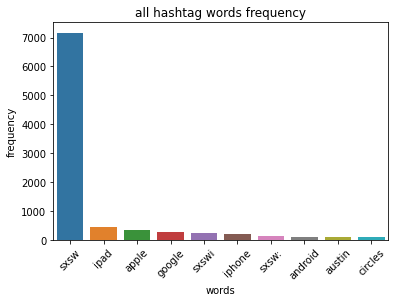

In [37]:
sns.barplot(x='words', y='frequency', data=df_allhashtag)
plt.xticks(rotation = 45)
plt.title('all hashtag words frequency')
plt.show()

In [22]:
# to create sparse matrix corpus is created to pass to vectorizer
len(train2)
corpus = []
for i in range(0,1274):
    corpus.append(train2['normalized_text'][i])
for i in range(1275,7274):
    corpus.append(train2['normalized_text'][i])
#corpus

In [23]:
len(corpus)

7273

In [24]:
cv = CountVectorizer(stop_words=stopwords.words('english'))
X=cv.fit_transform(corpus)

In [41]:
# X = cv.transform(corpus)

In [25]:
y = train2.iloc[:,1].values

In [26]:
y

array([1, 1, 2, ..., 1, 1, 1], dtype=int64)

In [27]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [28]:
classifier1 = LogisticRegression()
model=classifier1.fit(X_train, y_train)

C:\Users\Karan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)


In [30]:
print(f1_score(y_test, y_pred,average='weighted'))
print(classification_report(y_test, y_pred))

0.6569460199386347
              precision    recall  f1-score   support

           0       0.51      0.20      0.29       150
           1       0.72      0.83      0.77      1432
           2       0.60      0.52      0.56       776
           3       0.20      0.02      0.04        43

    accuracy                           0.68      2401
   macro avg       0.51      0.39      0.41      2401
weighted avg       0.66      0.68      0.66      2401



In [41]:
c2_train=cv.fit_transform(train2.normalized_text).toarray()
print(c2_train.shape)
c2_test=cv.transform(test.new_tweet).toarray()
print(c2_test.shape)

(7273, 7606)
(1819, 7606)


In [32]:
# final_model2=RandomForestClassifier()
# final_model2.fit(c2_train,y)

In [33]:
# y_pred2=final_model2.predict(c2_test)

In [34]:
# submission2 = pd.DataFrame({"tweet_id": test2["tweet_id"],"sentiment": y_pred2})
# submission2.to_csv((r'2nd_submission.csv'), index=False)

In [35]:
# test=test.new_tweet

In [36]:
# tests=cv.fit_transform(test)

In [37]:
# tests

In [38]:
final_model=LogisticRegression()
final_model.fit(c2_train,y)

C:\Users\Karan\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_pred=final_model.predict(c2_test)

In [57]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [40]:
submission = pd.DataFrame({"tweet_id": test2["tweet_id"],"sentiment": y_pred})
submission.to_csv((r'6th_submission.csv'), index=False)

In [59]:
# import nltk
# from nltk.corpus import stopwords

# nltk.download('stopwords')

In [60]:
# set(stopwords.words('english'))

In [61]:
# from nltk.corpus import stopwords
# stop = stopwords.words('english')


In [62]:
# def stop_words(df):
#     df['stopwords'] = df['tweet'].apply(lambda x: len([x for x in x.split() if x in stop]))
#     print(df[['tweet','stopwords']].head())

In [63]:
counts = train.groupby('sentiment').count()['tweet'].reset_index().sort_values(by='tweet',ascending=False)
counts.style.background_gradient(cmap='Reds')

,sentiment,tweet
1,1,4310
2,2,2382
0,0,456
3,3,125
